In [4]:
import pandas as pd 
import matplotlib.pyplot as plt  
df = pd.read_csv("Iris.csv") 
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
from sklearn.preprocessing import StandardScaler 
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] 
x = df.loc[:, features].values 
y = df.loc[:,['variety']].values 
x = StandardScaler().fit_transform(x) 


In [7]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(x) 
principalDf = pd.DataFrame(data = principalComponents 
 , columns = ['principal component 1', 'principal component 2']) 
finalDf = pd.concat([principalDf, df[['variety']]], axis = 1) 

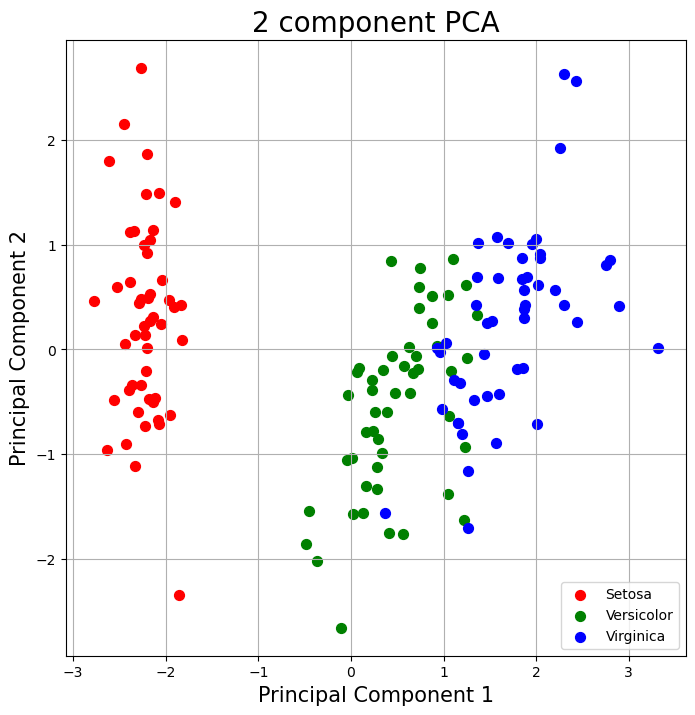

In [15]:
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 
targets = ['Setosa', 'Versicolor', 'Virginica'] 
colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['variety'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] 
     , finalDf.loc[indicesToKeep, 'principal component 2'] 
     , c = color 
     , s = 50) 
ax.legend(targets) 
ax.grid()